<a href="https://colab.research.google.com/github/AnilNITT/Womens-Clothing-E-Commerce-Reviews-using-NLTK/blob/master/Womens_Clothing_E_Commerce_Reviews_using_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AnilNITT/Machine-Learning-and-DataScience-Problems-DataSets/master/NLP%20Data/Womens%20Clothing%20E-Commerce%20Reviews.csv",na_values=['NA'])
data.head()

,ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
ID                         23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [0]:
text_data=data[['Review Text','Recommended IND']]

In [5]:
text_data.isna().sum()

Review Text        845
Recommended IND      0
dtype: int64

In [6]:
text_data=text_data.dropna()
print(text_data.shape)
text_data.isna().sum()

(22641, 2)


Review Text        0
Recommended IND    0
dtype: int64

### Spit the text data

In [0]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(text_data,test_size=0.1)

In [8]:
train.shape,test.shape

((20376, 2), (2265, 2))

In [0]:
train_pos = train[ train['Recommended IND'] == 1]
train_pos = train_pos['Review Text']
train_neg = train[ train['Recommended IND'] == 0]
train_neg = train_neg['Review Text']

In [10]:
train_pos.head()

17221    I love this top and was so happy when it came ...
18185    This dress is lovely in person- light rose col...
2558     This top is beautiful and special. the burnout...
14315    I got the grey in my normal size large and it ...
12717    When i saw this dress the model was standing i...
Name: Review Text, dtype: object

In [11]:
train_neg.tail()

13969    This would be a great dress if it was sized co...
18611    There is simply a ton of fabric on this tee. i...
8800     Agree with above review. these are described t...
3207     Unfortunately i didnt read the fine print when...
11204    I saw this jacket in the store and thought it ...
Name: Review Text, dtype: object

# NLTK

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from wordcloud import WordCloud,STOPWORDS

In [0]:
def wordcloud_draw(data,color='black'):
  words=' '.join(data)
  #print(words)
  cleaned_word=' '.join([word for word in words.split()])
  wordcloud=WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                      )
  wordcloud.generate(cleaned_word)

  plt.figure(figsize=(16,16))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

Positive words


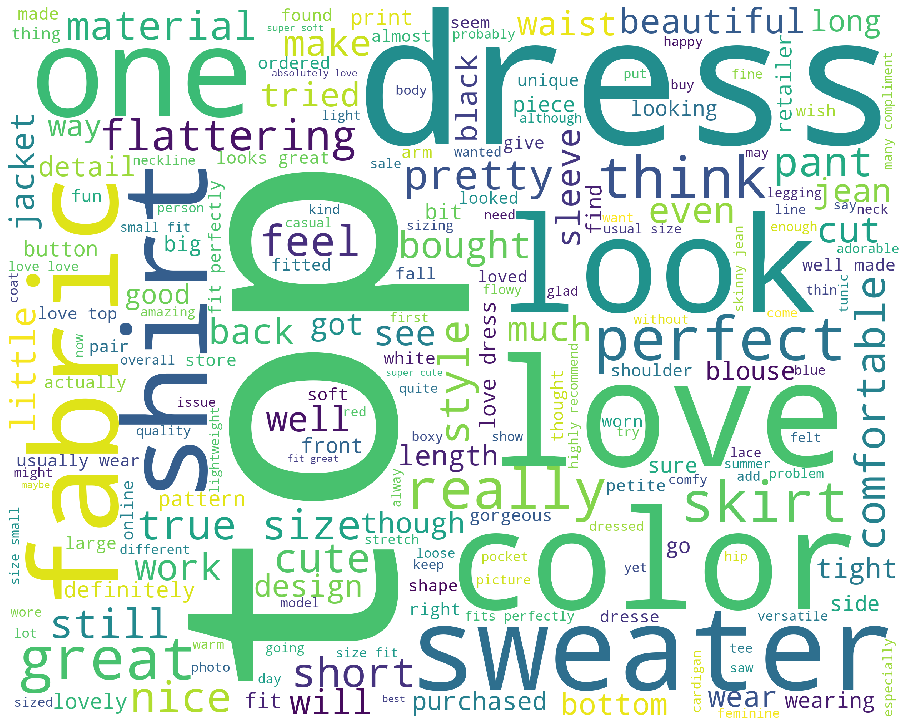

In [15]:

print("Positive words")
wordcloud_draw(train_pos,'white')

Negative words


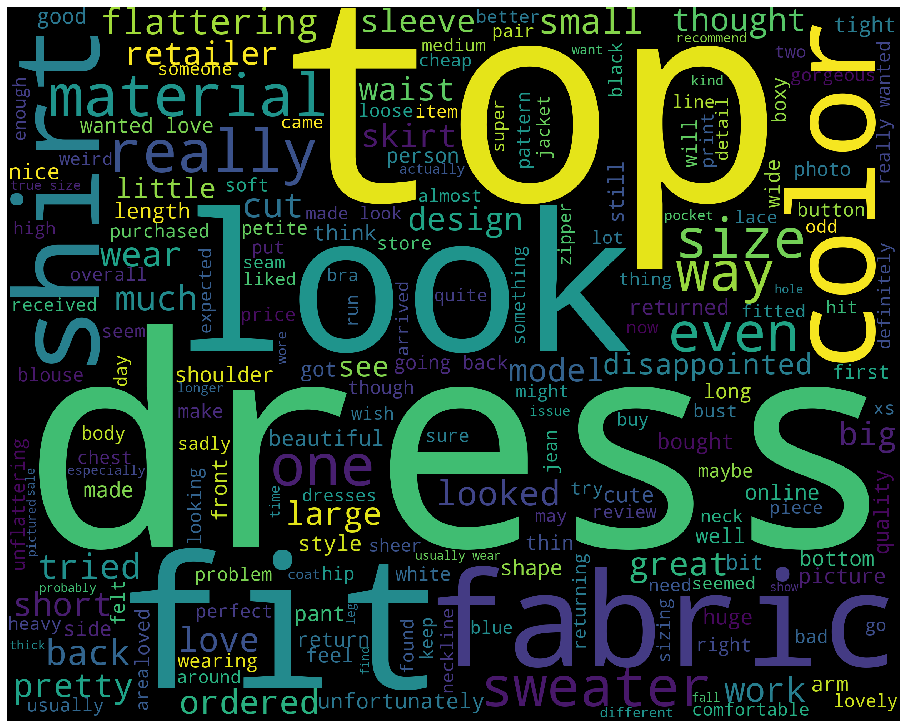

In [16]:

print("Negative words")
wordcloud_draw(train_neg)

In [17]:
stopwords.words

<bound method WordListCorpusReader.words of <WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>>

In [18]:
reviews=[]
stopwords_set=set(stopwords.words('english'))
stopwords_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
train.iterrows

<bound method DataFrame.iterrows of                                              Review Text  Recommended IND
17221  I love this top and was so happy when it came ...                1
2358   The blouse is lovely - i loved the lace, color...                0
18185  This dress is lovely in person- light rose col...                1
2558   This top is beautiful and special. the burnout...                1
14315  I got the grey in my normal size large and it ...                1
...                                                  ...              ...
13202  I was so excited to order this dress; however,...                1
19462  I bought this dress for my college graduation,...                1
18792  Lovely dress!  i&amp;amp;#39;m wearing it with...                1
11204  I saw this jacket in the store and thought it ...                0
17810  This skirt is a really beautiful print and mad...                1

[20376 rows x 2 columns]>

In [0]:
for index, row in train.iterrows():
  words_filtered=[e.lower() for e in row['Review Text'].split() if len(e)>=3]
  words_without_stopwords=[word for word in words_filtered if not word in stopwords_set]
  reviews.append((words_without_stopwords,row['Recommended IND']))

test_pos = test[ test['Recommended IND'] == 1]
test_pos = test_pos['Review Text']
test_neg = test[ test['Recommended IND'] == 0]
test_neg = test_neg['Review Text']

In [21]:
len(reviews)

20376

In [0]:
def get_words_in_reviews(reviews):
  all=[]
  for (words,sentiment) in reviews:
    all.extend(words)
  return all

In [0]:
def get_word_features(wordlist):
  wordlist=nltk.FreqDist(wordlist)
  features=wordlist.keys()
  return features

w_features=get_word_features(get_words_in_reviews(reviews))

In [0]:
def extract_features(document):
  document_words=set(document)
  features={}
  for word in w_features:
    features['contains(%s)'%word]=(word in document_words)
  return features

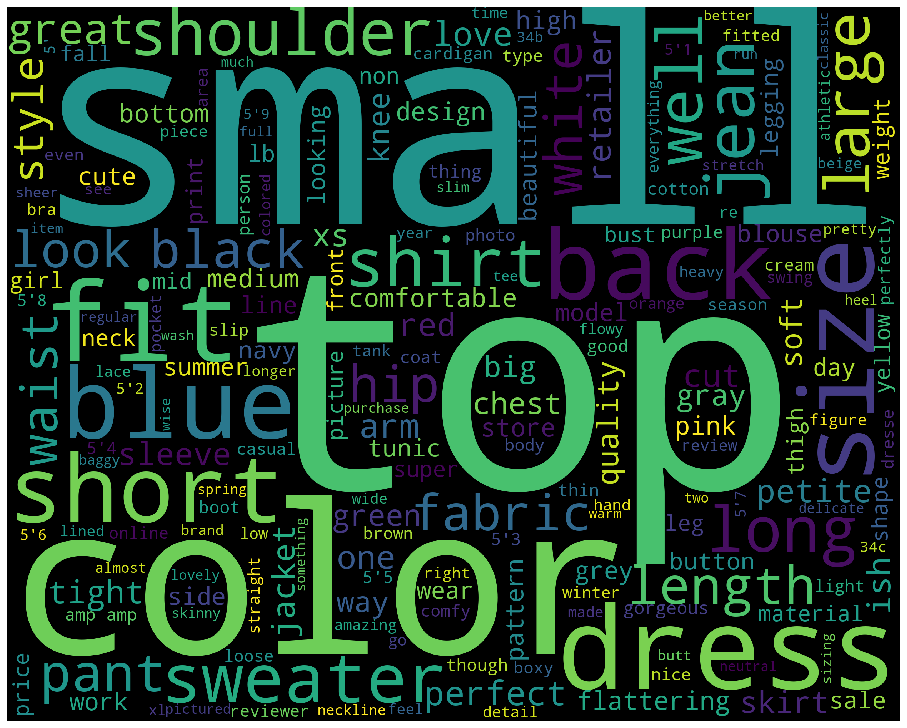

In [25]:
wordcloud_draw(w_features)

In [26]:
words_filtered

['this',
 'skirt',
 'really',
 'beautiful',
 'print',
 'and',
 'made',
 'lovely',
 'silky',
 'fabric.',
 "didn't",
 'have',
 'the',
 '"see-through"',
 'issue',
 'that',
 'the',
 'other',
 'reviewer',
 'mentioned,',
 'main',
 'concerns',
 'were',
 'the',
 'length',
 "(i'm",
 "5'1",
 'and',
 'almost',
 'goes',
 'ankles)',
 'and',
 'that',
 'poofs',
 'out',
 'little',
 'right',
 'below',
 'the',
 'waist',
 'band.',
 "i'm",
 'between',
 'small',
 'and',
 'medium',
 'and',
 'went',
 'with',
 'the',
 'small.',
 'fits',
 'but',
 'wonder',
 'would',
 'lie',
 'flatter',
 'and',
 'more',
 'flattering',
 'had',
 'gone',
 'with',
 'medium',
 'instead.']

In [27]:
words_without_stopwords

['skirt',
 'really',
 'beautiful',
 'print',
 'made',
 'lovely',
 'silky',
 'fabric.',
 '"see-through"',
 'issue',
 'reviewer',
 'mentioned,',
 'main',
 'concerns',
 'length',
 "(i'm",
 "5'1",
 'almost',
 'goes',
 'ankles)',
 'poofs',
 'little',
 'right',
 'waist',
 'band.',
 "i'm",
 'small',
 'medium',
 'went',
 'small.',
 'fits',
 'wonder',
 'would',
 'lie',
 'flatter',
 'flattering',
 'gone',
 'medium',
 'instead.']

In [0]:
training_set=nltk.classify.apply_features(extract_features,reviews)
classifier=nltk.NaiveBayesClassifier.train(training_set)

In [32]:
neg_cnt=0
pos_cnt=0
for obj in test_neg:
  res=classifier.classify(extract_features(obj.split()))
  if (res==0):
    neg_cnt+=1

for obj in test_pos:
  res=classifier.classify(extract_features(obj.split()))
  if (res==1):
    pos_cnt+=1

print("[Negative]:%s%s"%(len(test_neg),neg_cnt))
print("[Positive]:%s%s"%(len(test_pos),pos_cnt))

[Negative]:407225
[Positive]:18581757


In [33]:
data.describe()

,ID,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000
